In [2]:

from matplotlib import pyplot as plt
import numpy as np

import pandas as pd


# 1

In [5]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [12]:
# get 1000 random numbers between 0 and 10000
income_of_all_people = np.random.rand(1000)*10000
print(gini(income_of_all_people))

0.33769756221028213


In [46]:
# load the data income.html
tabel = pd.read_html("income.html")

In [47]:
income_distribution_by_percentile = tabel[0]

In [48]:
# drop the 0 and 1 column
income_distribution_by_percentile = income_distribution_by_percentile.drop(index=[0, 1], axis=0)
income_distribution_by_percentile

,Unnamed: 0,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,Percentile 1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.2,-0.2
3,Percentile 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Percentile 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Percentile 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Percentile 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Percentile 96,2.5,2.5,2.5,2.6,2.6,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
98,Percentile 97,2.7,2.7,2.8,2.8,2.8,2.8,2.8,2.7,2.7,2.7,2.8,2.7,2.7
99,Percentile 98,3.1,3.1,3.1,3.2,3.3,3.3,3.3,3.1,3.1,3.1,3.2,3.2,3.1
100,Percentile 99,3.8,3.8,3.8,4.0,4.2,4.2,4.2,3.9,3.9,3.9,4.2,4.1,3.9


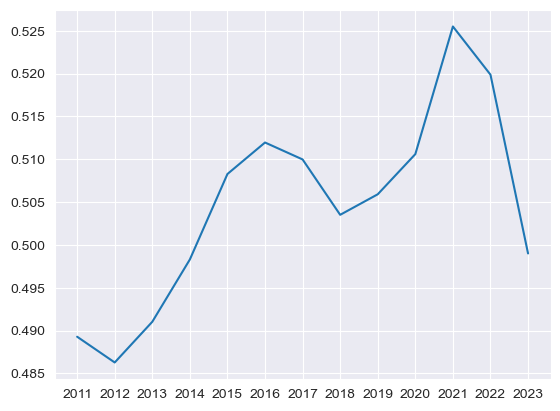

In [59]:
#
years = income_distribution_by_percentile.columns[1:]
ginis = []
for year in years:
    ginis.append( gini(list(income_distribution_by_percentile[year])))
plt.plot(years, ginis)

#gini(income_distribution_by_percentile['2011'])

In [104]:
def iso_gini(x,l,u):
    """ Returns the value of the Lorenz curve at p """

    lower = int(l * len(x))
    upper = int(u * len(x))
    print(lower, upper)
    return gini(x[lower:upper])

[[0, 0.4], [0.4, 0.8], [0.8, 0.99]]
0 40
0 40
0 40
0 40
0 40
0 40
0 40
0 40
0 40
0 40
0 40
0 40
0 40
40 80
40 80
40 80
40 80
40 80
40 80
40 80
40 80
40 80
40 80
40 80
40 80
40 80
80 99
80 99
80 99
80 99
80 99
80 99
80 99
80 99
80 99
80 99
80 99
80 99
80 99


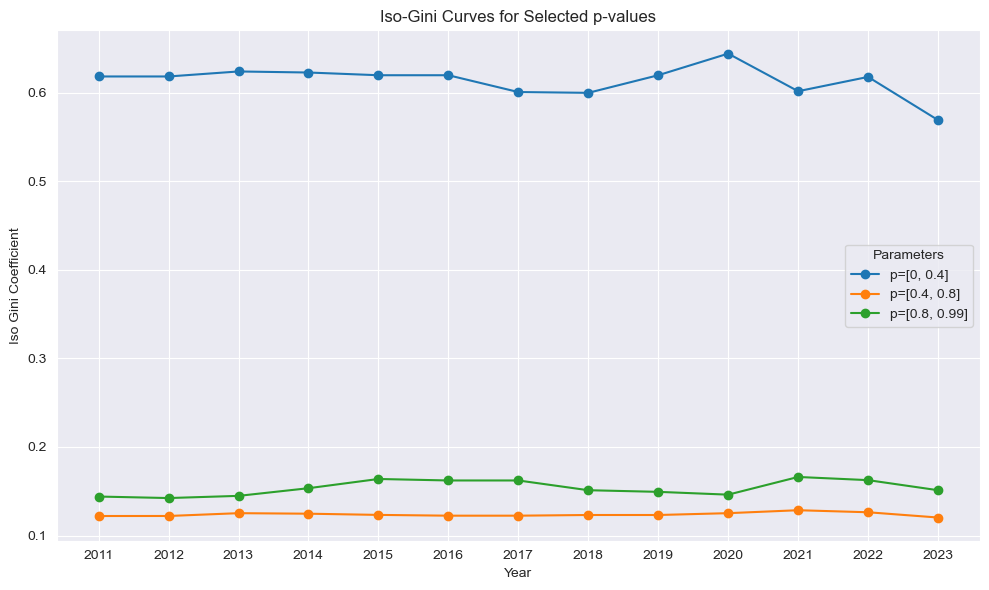

In [106]:
# plot the iso gini curve for p = 0.2, 0.4, 0.6, 0.8 and all years

plt.figure(figsize=(10, 6))

 # values form 0.1 to 1 in steps of 0.1
p_values = [[0, 0.4], [0.4,0.8], [0.8, 0.99]]
print(p_values)
for p in p_values:
    iso_gini_values = []
    for year in years:
        iso_gini_values.append(iso_gini(list(income_distribution_by_percentile[year]), p[0], p[1]))
    plt.plot(years, iso_gini_values, marker='o', label=f"p={p}")

plt.xlabel("Year")
plt.ylabel("Iso Gini Coefficient")
plt.title("Iso-Gini Curves for Selected p-values")
plt.legend(title="Parameters")
plt.grid(True)
plt.tight_layout()
plt.show()

,Unnamed: 0,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,Percentile 1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.2,-0.2
3,Percentile 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Percentile 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Percentile 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Percentile 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Percentile 96,2.5,2.5,2.5,2.6,2.6,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
98,Percentile 97,2.7,2.7,2.8,2.8,2.8,2.8,2.8,2.7,2.7,2.7,2.8,2.7,2.7
99,Percentile 98,3.1,3.1,3.1,3.2,3.3,3.3,3.3,3.1,3.1,3.1,3.2,3.2,3.1
100,Percentile 99,3.8,3.8,3.8,4.0,4.2,4.2,4.2,3.9,3.9,3.9,4.2,4.1,3.9
